# Understanding Evaluation Metrics for Machine Learning models

When applying Machine Learning model, evaluating the performance of models is the most important stage.

That's where evaluation metrics come in.

We will cover these metrics, from regression to classification and clustering.

Evaluation metrics are measures used to assess the performance of machine learning models.

They allow us to quantify the quality of predictions made by these models. The metrics are different for different types of problems, such as regression, classification, and clustering problems.

We need them because they provide a way to understand the degree of accuracy and reliability of our models. They help in tuning and optimizing models and are essential in comparing and selecting the best performing models.s.ing,

## Coding Regression Evaluation Metrics

In [2]:
from sklearn import metrics
import pandas as pd
import numpy as np

# assuming y_test are the true values and y_pred are the predicted values.
# replace these with your actual data.
y_test = np.array([1.2, 3.4, 2.2, 4.5, 3.3, 5.6])
y_pred = np.array([1.3, 3.5, 2.1, 4.4, 3.2, 5.7])

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or you can use 'rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))'
r2 = metrics.r2_score(y_test, y_pred)

# create a data frame
pred_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
pred_df['Absolute Error'] = np.abs(pred_df['True Values'] - pred_df['Predicted Values'])

# print results
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

display(pred_df)

Mean Absolute Error: 0.10000000000000002
Mean Squared Error: 0.010000000000000002
Root Mean Squared Error: 0.1
R2 Score: 0.9951351351351352


,True Values,Predicted Values,Absolute Error
0,1.2,1.3,0.1
1,3.4,3.5,0.1
2,2.2,2.1,0.1
3,4.5,4.4,0.1
4,3.3,3.2,0.1
5,5.6,5.7,0.1


## Coding Classification Evaluation Metrics

In [3]:
from sklearn import metrics
import pandas as pd
import numpy as np

# assuming y_test are the true labels and y_pred are the predicted labels
# replace these with your actual data
y_test = np.array([0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 1, 1])

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_mat = metrics.confusion_matrix(y_test, y_pred)

# create a data frame
pred_df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# print results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Confusion Matrix:\n', confusion_mat)

display(pred_df)

Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[2 1]
 [1 2]]


,True Labels,Predicted Labels
0,0,0
1,1,1
2,1,0
3,0,0
4,1,1
5,0,1


### Plot Confusion matrix using matplotlib

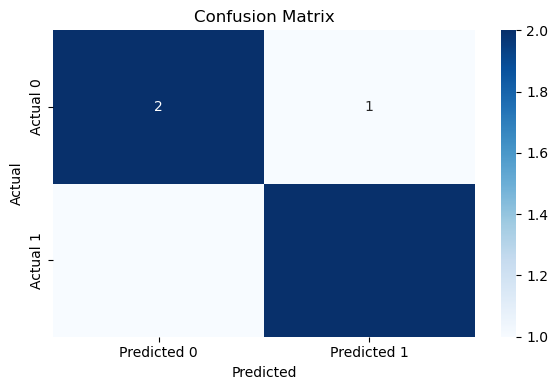

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Labels
x_labels = ['Predicted 0', 'Predicted 1']
y_labels = ['Actual 0', 'Actual 1']

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=x_labels,
            yticklabels=y_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Plot Confusion matrix using plotly

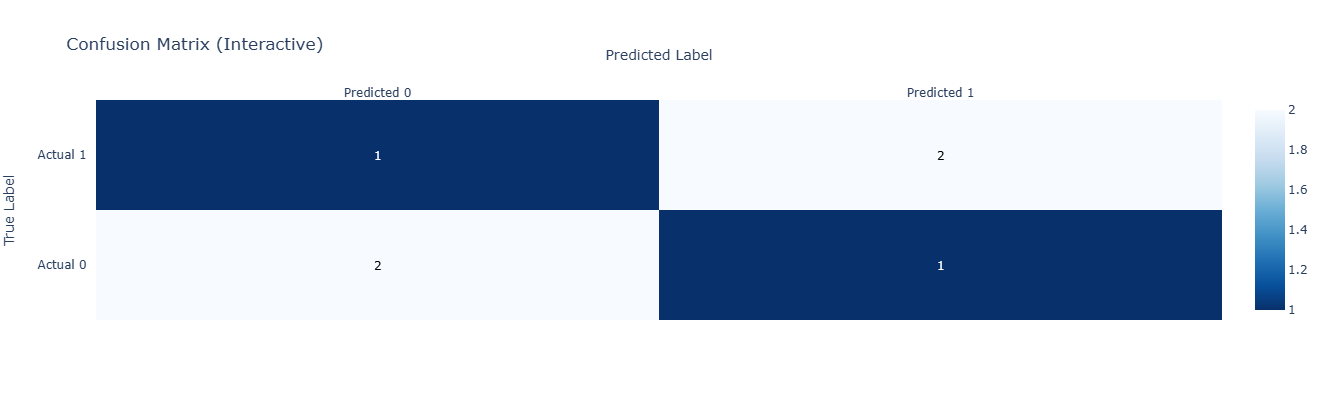

In [11]:
import plotly.figure_factory as ff

# Create annotated heatmap
fig = ff.create_annotated_heatmap(
    z=confusion_mat,
    x=x_labels,
    y=y_labels,
    colorscale='Blues',
    showscale=True,
    reversescale=True,
    hoverinfo="z"
)

fig.update_layout(
    width=600,
    height=400,
    title_text='Confusion Matrix (Interactive)',
    xaxis=dict(title='Predicted Label'),
    yaxis=dict(title='True Label')
)

fig.show()

## Coding Clustering Evaluation Metrics

In [13]:
from sklearn import metrics
import pandas as pd
import numpy as np

# assuming labels_true are the true labels and labels_pred are the labels predicted by your model
# replace these with your actual data
labels_true = np.array([0, 1, 1, 0, 1, 0])
labels_pred = np.array([0, 1, 0, 0, 1, 1])

# For the silhouette score, you also need the feature matrix, which we will call X.
# Replace X with your actual data.
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

ari = metrics.adjusted_rand_score(labels_true, labels_pred)
nmi = metrics.normalized_mutual_info_score(labels_true, labels_pred)
silhouette = metrics.silhouette_score(X, labels_pred, metric='euclidean')

# create a data frame
pred_df = pd.DataFrame({'True Labels': labels_true, 'Predicted Labels': labels_pred})

# print results
print('Adjusted Rand Index:', ari)
print('Normalized Mutual Information:', nmi)
print('Silhouette Score:', silhouette)

display(pred_df)

Adjusted Rand Index: -0.1111111111111111
Normalized Mutual Information: 0.08170416594551082
Silhouette Score: -0.04991224991870092


,True Labels,Predicted Labels
0,0,0
1,1,1
2,1,0
3,0,0
4,1,1
5,0,1
